In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covid-19-data/us-counties.csv")
cook_counties = df[((df["county"]=="Cook") & (df["state"]=="Illinois"))]

In [3]:
cook_counties

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
11,2020-01-26,Cook,Illinois,17031.0,1,0
16,2020-01-27,Cook,Illinois,17031.0,1,0
21,2020-01-28,Cook,Illinois,17031.0,1,0
...,...,...,...,...,...,...
357686,2020-07-22,Cook,Illinois,17031.0,100124,4801
360892,2020-07-23,Cook,Illinois,17031.0,100795,4810
364100,2020-07-24,Cook,Illinois,17031.0,101420,4822
367307,2020-07-25,Cook,Illinois,17031.0,101955,4829


In [4]:
# Get the daily death count
for index in range(len(cook_counties)):
    _id = cook_counties.iloc[index].name
    if index == 0:
        cook_counties.loc[_id, "daily_deaths"] = cook_counties.loc[_id, "deaths"]
    else:
        cook_counties.loc[_id, "daily_deaths"] = cook_counties.loc[_id, "deaths"] - prev_count  # compute the dif between today's total # of deaths and yesterday's
    
    prev_count = cook_counties.loc[_id, "deaths"]

/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
# Get the daily case count
for index in range(len(cook_counties)):
    _id = cook_counties.iloc[index].name
    if index == 0:
        cook_counties.loc[_id, "daily_cases"] = cook_counties.loc[_id, "cases"]
    else:
        cook_counties.loc[_id, "daily_cases"] = cook_counties.loc[_id, "cases"] - prev_count  # compute the dif between today's total # of deaths and yesterday's
    
    prev_count = cook_counties.loc[_id, "cases"]

In [6]:
last_90 = cook_counties.tail(90)

In [7]:
last_90

,date,county,state,fips,cases,deaths,daily_deaths,daily_cases
95893,2020-04-28,Cook,Illinois,17031.0,33449,1457,110.0,1496.0
98736,2020-04-29,Cook,Illinois,17031.0,34880,1516,59.0,1431.0
101586,2020-04-30,Cook,Illinois,17031.0,36513,1607,91.0,1633.0
104441,2020-05-01,Cook,Illinois,17031.0,38668,1673,66.0,2155.0
107305,2020-05-02,Cook,Illinois,17031.0,40227,1743,70.0,1559.0
...,...,...,...,...,...,...,...,...
357686,2020-07-22,Cook,Illinois,17031.0,100124,4801,13.0,660.0
360892,2020-07-23,Cook,Illinois,17031.0,100795,4810,9.0,671.0
364100,2020-07-24,Cook,Illinois,17031.0,101420,4822,12.0,625.0
367307,2020-07-25,Cook,Illinois,17031.0,101955,4829,7.0,535.0


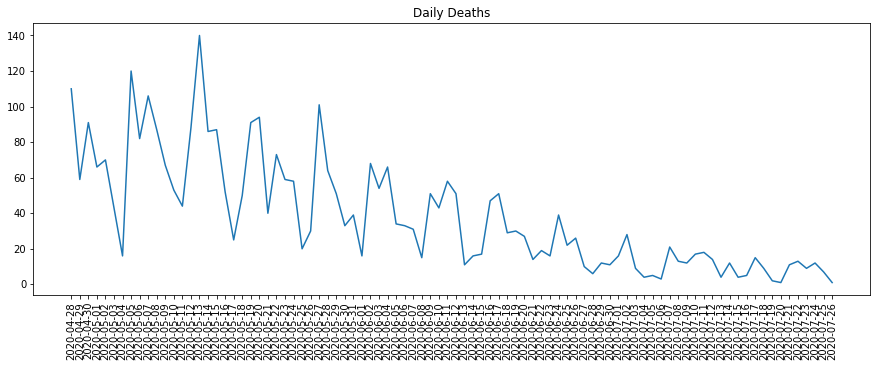

In [8]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xticks(rotation="90")
plt.title("Daily Deaths")
ax.plot(last_90["date"], last_90["daily_deaths"])

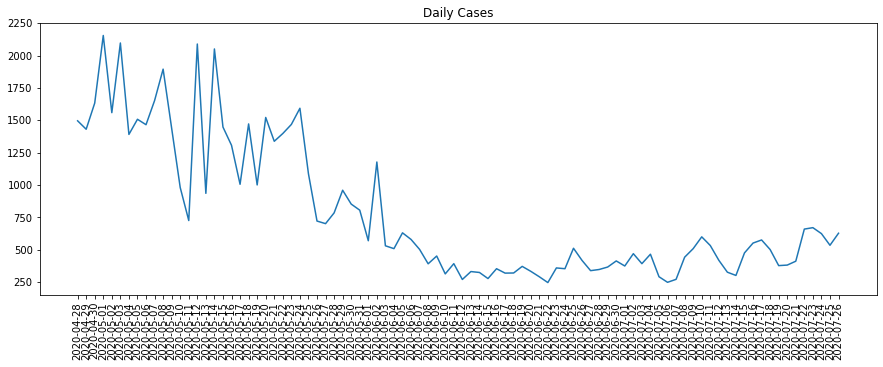

In [9]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xticks(rotation="90")
plt.title("Daily Cases")
ax.plot(last_90["date"], last_90["daily_cases"])

In [10]:
print("Number of cases for the past two weeks: \n")
print(last_90["daily_cases"].tail(14).values)

Number of cases for the past two weeks: 

[327. 302. 476. 552. 576. 502. 378. 382. 412. 660. 671. 625. 535. 628.]


In [11]:
print("Number of deaths for the past two weeks: \n")
print(last_90["daily_deaths"].tail(14).values)

Number of deaths for the past two weeks: 

[ 4. 12.  4.  5. 15.  9.  2.  1. 11. 13.  9. 12.  7.  1.]
